In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsap

In [227]:
bt=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/bitcoin.csv")
bt

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.5400,67070.4000,63742.7300,64291.0700,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.0200,67174.0200,65884.1500,66386.6100,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.0200,67180.0300,64598.0000,66818.8900,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.7500,65638.7400,64302.4700,64896.8700,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11,1.263725e+12
...,...,...,...,...,...,...,...,...
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.000000e+00,0.000000e+00
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.000000e+00,0.000000e+00
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.000000e+00,0.000000e+00
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.000000e+00,0.000000e+00


# **Exploratory Data Analysis (EDA)**

In [228]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       5021 non-null   object 
 1   End         5021 non-null   object 
 2   Open        5021 non-null   float64
 3   High        5021 non-null   float64
 4   Low         5021 non-null   float64
 5   Close       5021 non-null   float64
 6   Volume      5021 non-null   float64
 7   Market Cap  5021 non-null   float64
dtypes: float64(6), object(2)
memory usage: 313.9+ KB


In [229]:
bt.shape

(5021, 8)

In [230]:
bt.size

40168

In [231]:
bt.isnull().sum()

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [232]:
bt.Start=pd.to_datetime(bt.Start,errors="ignore")
bt.End=pd.to_datetime(bt.End,errors="ignore")
bt

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.5400,67070.4000,63742.7300,64291.0700,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.0200,67174.0200,65884.1500,66386.6100,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.0200,67180.0300,64598.0000,66818.8900,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.7500,65638.7400,64302.4700,64896.8700,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11,1.263725e+12
...,...,...,...,...,...,...,...,...
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.000000e+00,0.000000e+00
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.000000e+00,0.000000e+00
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.000000e+00,0.000000e+00
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.000000e+00,0.000000e+00


In [233]:
bt.columns

Index(['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [234]:
bt.Volume=bt.Volume.round(2)
bt.rename(columns={"Market Cap":"Market_Cap"},inplace=True)
bt.Market_Cap=bt.Market_Cap.round(2)
bt.Open=bt.Open.round(2)
bt.High=bt.High.round(2)
bt.Low=bt.Low.round(2)
bt.Close=bt.Close.round(2)
bt

,Start,End,Open,High,Low,Close,Volume,Market_Cap
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12
...,...,...,...,...,...,...,...,...
5016,2010-07-31,2010-08-01,0.07,0.07,0.07,0.07,0.000000e+00,0.000000e+00
5017,2010-07-30,2010-07-31,0.06,0.06,0.06,0.06,0.000000e+00,0.000000e+00
5018,2010-07-29,2010-07-30,0.07,0.07,0.07,0.07,0.000000e+00,0.000000e+00
5019,2010-07-28,2010-07-29,0.06,0.06,0.06,0.06,0.000000e+00,0.000000e+00


In [235]:
# Highest Market cap
bt['Market_Cap'].max()

1428493117552.55

In [236]:
# Lowest Openning
bt["Open"].min()

0.06

In [237]:
# Average Volume of stocks
bt["Volume"].mean()

20346382450.514046

# **Data Visualization**

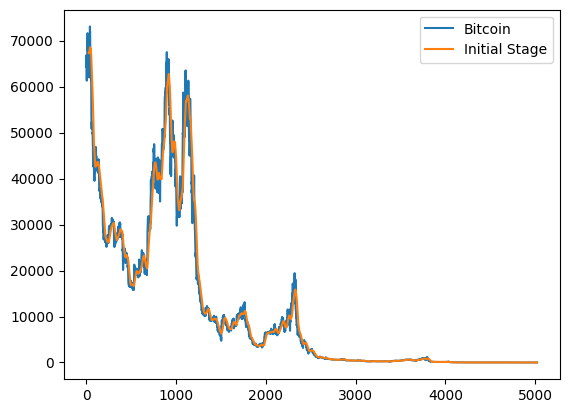

In [238]:
plt.plot(figsize=(10,5))
bt.Close.plot(label="Bitcoin")
bt.Close.rolling(30).mean().plot(label="Initial Stage")
plt.legend(loc="best")
plt.show()

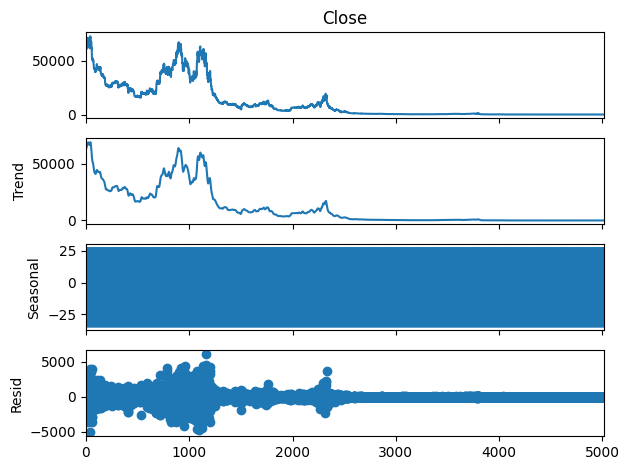

In [239]:
seasonal=seasonal_decompose(bt.Close,period=12)
seasonal.plot()
plt.show()

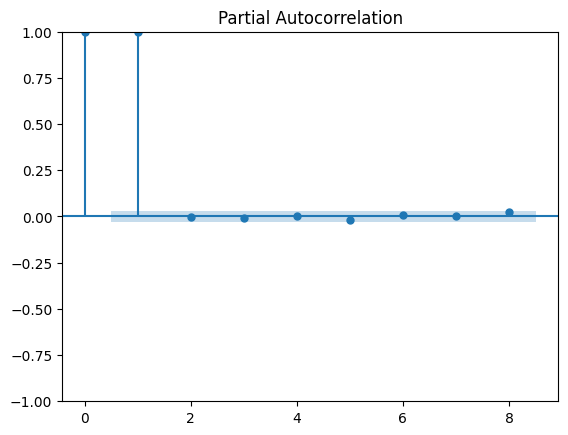

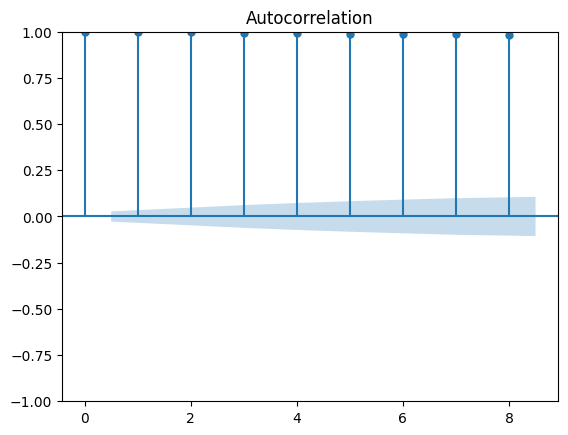

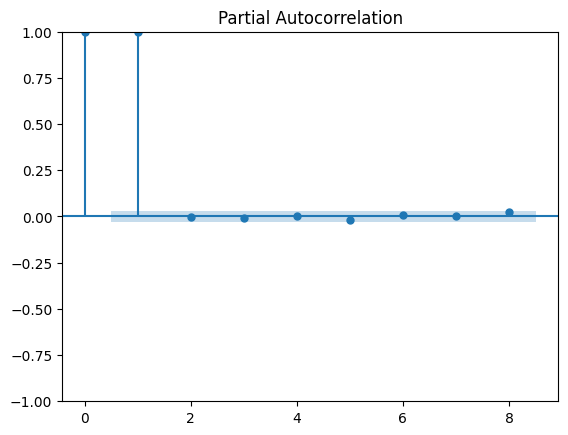

In [240]:
tsap.plot_acf(bt.Close,lags=8)
tsap.plot_pacf(bt.Close,lags=8)

<ipython-input-241-ce5a7782f123>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_stocks.index,y=high_stocks.values,palette="inferno")


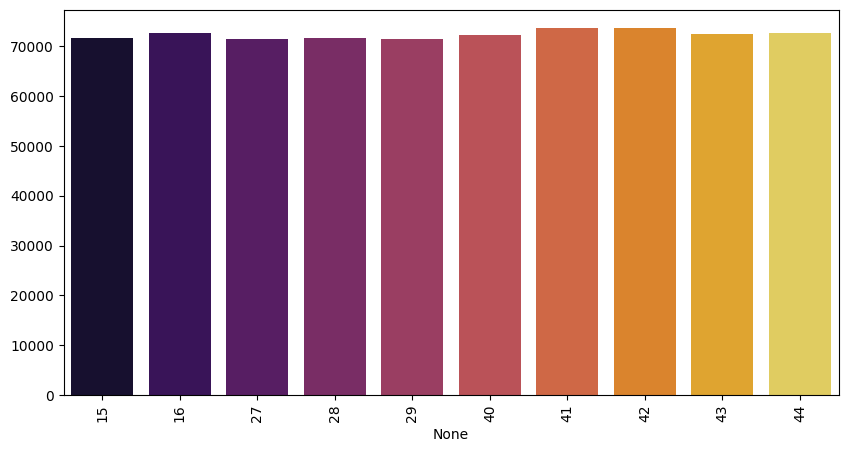

In [241]:
# Top 10 High Stocks
plt.figure(figsize=(10,5))
high_stocks=bt.High.sort_values(ascending=False)[:10]
sns.barplot(x=high_stocks.index,y=high_stocks.values,palette="inferno")
plt.xticks(rotation=90)
plt.show()

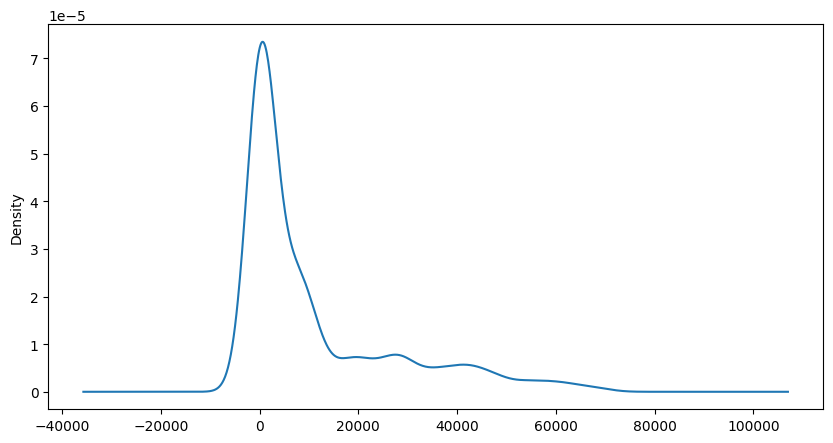

In [242]:
# Low Stocks
plt.figure(figsize=(10,5))
bt.Low.plot(kind="kde")
plt.show()

# **Forecasting**

In [243]:
train=bt.head(4900)
test=bt.tail(121)

In [244]:
def MAPE(pred,org):
  temp=np.abs((pred-org)/org)*100
  return np.mean(temp)

# Simple Exponential Smoothing

In [245]:
ses=SimpleExpSmoothing(train.Close).fit(smoothing_level=0.7)
sesdf=pd.DataFrame()
sespr=ses.predict(start=test.index[0],end=test.index[-1])
MAPE(sespr,test.Close)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


243.66828830731365

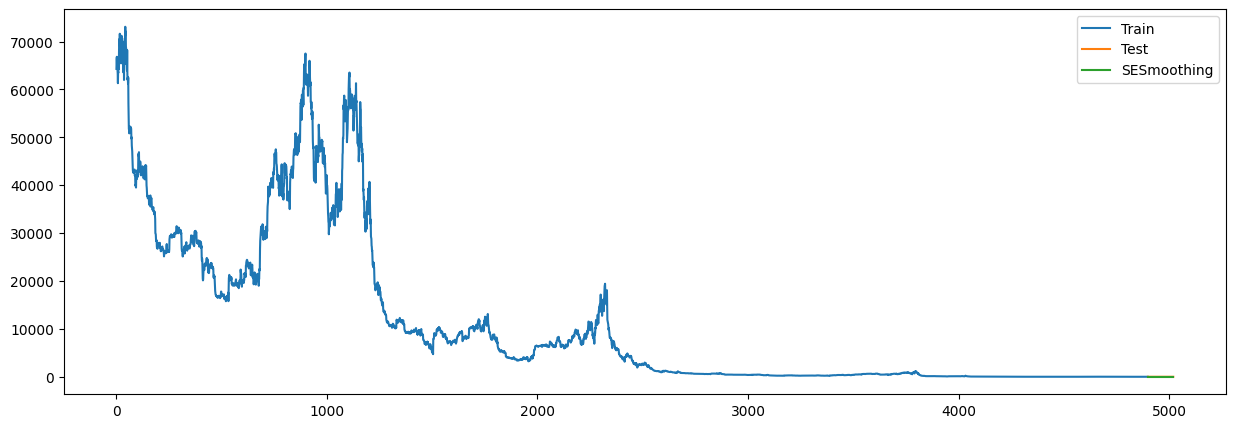

In [246]:
plt.figure(figsize=(15,5))
plt.plot(train.Close,label="Train")
plt.plot(test.Close,label="Test")
plt.plot(sespr,label="SESmoothing")
plt.legend(loc="best")
plt.show()

# Holt

In [247]:
holt=Holt(train.Close).fit(smoothing_level=0.50,smoothing_trend=0.7)
holtdf=pd.DataFrame()
holtpr=holt.predict(start=test.index[0],end=test.index[-1])
MAPE(holtpr,test.Close)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


1101.71190689932

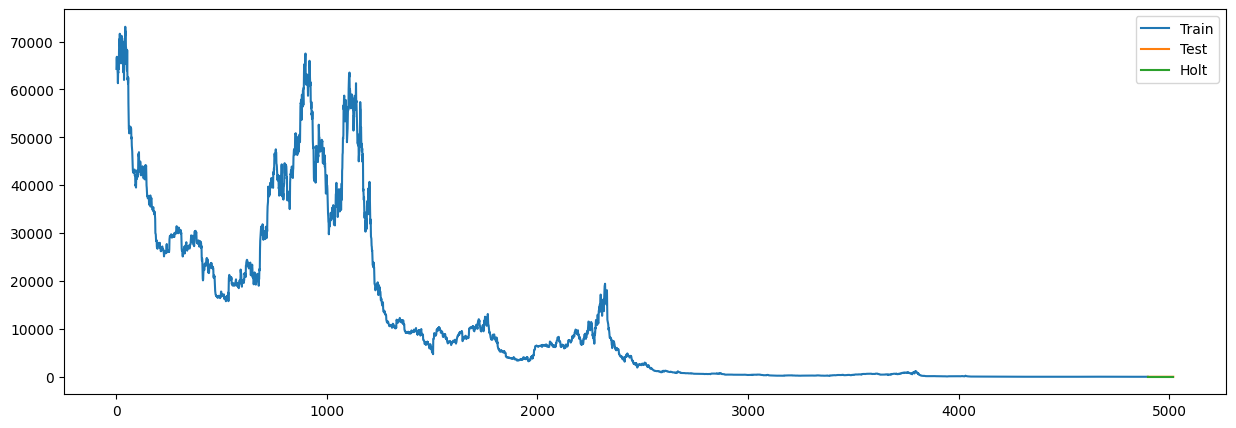

In [248]:
plt.figure(figsize=(15,5))
plt.plot(train.Close,label="Train")
plt.plot(test.Close,label="Test")
plt.plot(holtpr,label="Holt")
plt.legend(loc="best")
plt.show()

# Exponential Smoothing

In [249]:
exps=ExponentialSmoothing(train.Close,seasonal="add",trend="add",seasonal_periods=12).fit()
expsdf=pd.DataFrame()
expspr=exps.predict(start=test.index[0],end=test.index[-1])
MAPE(expspr,test.Close)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


193827.1868650477

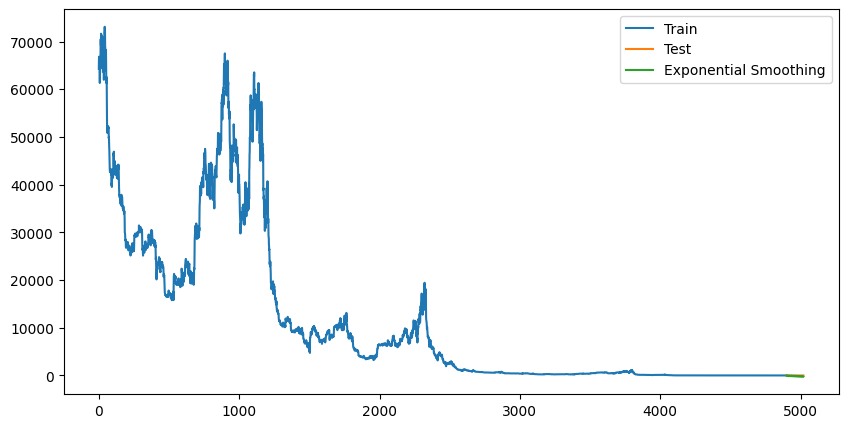

In [250]:
plt.figure(figsize=(10,5))
plt.plot(train.Close,label="Train")
plt.plot(test.Close,label="Test")
plt.plot(expspr,label="Exponential Smoothing")
plt.legend(loc="best")
plt.show()

# Final Forecasts

In [251]:
# Simple Exponential Smoothing
final_ses=SimpleExpSmoothing(bt.Close).fit(smoothing_level=0.7)
final_sesforecast=final_ses.forecast(10)
final_sesforecast

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


5021    0.060687
5022    0.060687
5023    0.060687
5024    0.060687
5025    0.060687
5026    0.060687
5027    0.060687
5028    0.060687
5029    0.060687
5030    0.060687
dtype: float64

In [252]:
# Holt
final_holt=Holt(bt.Close).fit(smoothing_level=0.50,smoothing_trend=0.7)
final_holtforecast=final_holt.forecast(10)
final_holtforecast

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


5021    0.059390
5022    0.056902
5023    0.054413
5024    0.051925
5025    0.049437
5026    0.046949
5027    0.044461
5028    0.041972
5029    0.039484
5030    0.036996
dtype: float64

In [253]:
# Exponential Smoothing
final_es=ExponentialSmoothing(bt.Close,seasonal="add",trend="add",seasonal_periods=12).fit()
final_esforecast=final_es.forecast(10)
final_esforecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


5021   -31.688854
5022   -62.459579
5023   -86.413589
5024   -97.243855
5025   -92.453152
5026   -73.524836
5027   -46.089771
5028   -17.967580
5029     3.175648
5030    11.872116
dtype: float64